<a href="https://colab.research.google.com/github/codrae/ATG-BEMS/blob/main/Db_to_csv_Downloader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
# pyodbc 라이브러리 설치
# pyodbc는 Python에서 ODBC(Open Database Connectivity)를 통해 다양한 데이터베이스에 연결할 수 있도록 해주는 라이브러리입니다.
# 이 라이브러리는 Microsoft SQL Server, MySQL, PostgreSQL 등 여러 데이터베이스에 대한 ODBC 연결을 지원합니다.
# 설치 후, ODBC 드라이버를 사용하여 데이터베이스 연결과 쿼리 실행이 가능합니다.
!pip install pyodbc

In [100]:
%%sh
# unixodbc-dev 설치
apt-get install -y unixodbc-dev

# Microsoft GPG 키를 다운로드하고 /etc/apt/trusted.gpg.d/에 저장
curl https://packages.microsoft.com/keys/microsoft.asc | gpg --dearmor > /etc/apt/trusted.gpg.d/microsoft.gpg

# Ubuntu 버전에 맞는 Microsoft SQL Server 패키지 저장소 추가
curl https://packages.microsoft.com/config/ubuntu/$(lsb_release -rs)/prod.list > /etc/apt/sources.list.d/mssql-release.list

# 패키지 리스트 업데이트
apt-get update

# Microsoft ODBC Driver 17 for SQL Server 설치
ACCEPT_EULA=Y apt-get -q -y install msodbcsql17

Reading package lists...
Building dependency tree...
Reading state information...
unixodbc-dev is already the newest version (2.3.9-5ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 50 not upgraded.
Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:7 https://packages.microsoft.com/ubuntu/22.04/prod jammy InRelease
Ign:8 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:9 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpa

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   983  100   983    0     0   2589      0 --:--:-- --:--:-- --:--:--  2593
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100    88  100    88    0     0    305      0 --:--:-- --:--:-- --:--:--   304
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [104]:
import pyodbc

# 설치된 ODBC 드라이버 목록을 가져와 리스트로 저장
# pyodbc.drivers()는 시스템에 설치된 모든 ODBC 드라이버의 이름을 반환합니다.
drivers = [driver for driver in pyodbc.drivers()]

# 사용 가능한 ODBC 드라이버 목록 출력
print(drivers)

['ODBC Driver 17 for SQL Server']


In [136]:
# MSSQL 서버 연결 설정
server =   # MSSQL 서버 IP 주소
port =             # 서버 포트 번호
database =           # 데이터베이스 이름
username =       # MSSQL 서버 사용자 이름
password =     # MSSQL 서버 사용자 비밀번호
driver =   # 사용하는 ODBC 드라이버

# 연결 문자열 생성
# 서버 정보, 데이터베이스 이름, 사용자 인증 정보 등을 포함한 연결 문자열을 생성
conn_str = f'DRIVER={driver};SERVER={server},{port};DATABASE={database};UID={username};PWD={password}'

# pyodbc.connect()로 MSSQL 서버에 연결
connection = pyodbc.connect(conn_str)

# 커서 생성
cursor = connection.cursor()

# SQL 쿼리 실행
query  = "SELECT DataValue, TimeStamp, DateTime FROM Tech_All_KWH WHERE Building = '*' ORDER BY DateTime"

# 쿼리 실행 후 결과 가져오기
cursor.execute(query)
rows = cursor.fetchall()  # 모든 행을 fetch

# 결과 중 상위 5개의 행을 출력
for i in range(5):
    print(rows[i])

# 최적화 측면에서의 추가 작업은 필요하지 않음.
# 데이터 가져오는 방식은 효율적이고, 반복문은 필요한 만큼만 사용되었음.

(31666079.0, 1713846000, datetime.datetime(2024, 4, 23, 13, 20))
(31666159.0, 1713846600, datetime.datetime(2024, 4, 23, 13, 30))
(31666242.0, 1713847200, datetime.datetime(2024, 4, 23, 13, 40))
(31666324.0, 1713847800, datetime.datetime(2024, 4, 23, 13, 50))
(31666407.0, 1713848400, datetime.datetime(2024, 4, 23, 14, 0))


In [137]:
import pandas as pd
import datetime

# 데이터 리스트를 pandas DataFrame으로 변환
# 'rows' 리스트의 각 요소가 리스트 형태로 변환된 후 DataFrame으로 만들어짐
# 각 열은 'Building', 'DataValue', 'TimeStamp', 'DateTime'으로 정의
df = pd.DataFrame([list(row) for row in rows], columns=['DataValue', 'TimeStamp', 'DateTime'])

# DateTime 컬럼을 datetime 형식으로 변환
# 이 단계에서는 'DateTime' 열을 pandas의 datetime 객체로 변환하여 날짜/시간 데이터로 처리 가능하게 함
df['DateTime'] = pd.to_datetime(df['DateTime'])

# DataFrame의 처음 5개 행을 출력하여 결과 확인
df.head()

,DataValue,TimeStamp,DateTime
0,31666079.0,1713846000,2024-04-23 13:20:00
1,31666159.0,1713846600,2024-04-23 13:30:00
2,31666242.0,1713847200,2024-04-23 13:40:00
3,31666324.0,1713847800,2024-04-23 13:50:00
4,31666407.0,1713848400,2024-04-23 14:00:00


In [132]:
# 함수로 정의
def analyze_dataframe(df):
    import pandas as pd
    import matplotlib.pyplot as plt
    import numpy as np
    from scipy.stats import zscore

    # 결측치 확인
    missing_values = df.isnull().sum()

    # Z-score를 사용한 이상치 확인
    df['zscore'] = zscore(df['DataValue'])
    outliers_zscore = df[df['zscore'].abs() > 3]

    # DataValue가 0인 값 확인
    zero_values = df[df['DataValue'] == 0]

    # 전체 시각화
    plt.figure(figsize=(10, 6))
    plt.plot(df['DateTime'], df['DataValue'], marker='o', label='DataValue')
    plt.title('DataValue Trend Over Time')
    plt.xlabel('DateTime')
    plt.ylabel('DataValue')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # 각 결과를 한 줄로 출력
    print(f"결측치 개수: {missing_values}")
    print(f"이상치 개수 (Z-score > 3): {outliers_zscore.shape[0]}")
    print(f"DataValue가 0인 값 개수: {zero_values.shape[0]}")

    df = df.drop(columns=['zscore'], errors='ignore')

 # 누락된 데이터포인트 구간을 찾아서 출력
    previous_time = None
    for current_time in df['DateTime']:
        if previous_time is not None:
            time_diff_minutes = (current_time - previous_time).total_seconds() / 60
            if time_diff_minutes > 10:
                missing_points = (time_diff_minutes // 10) - 1
                print(f"누락된 구간: {previous_time.strftime('%Y-%m-%d %H:%M')} ~ {current_time.strftime('%H:%M')}, 누락된 데이터포인트: {int(missing_points)}개")
        previous_time = current_time



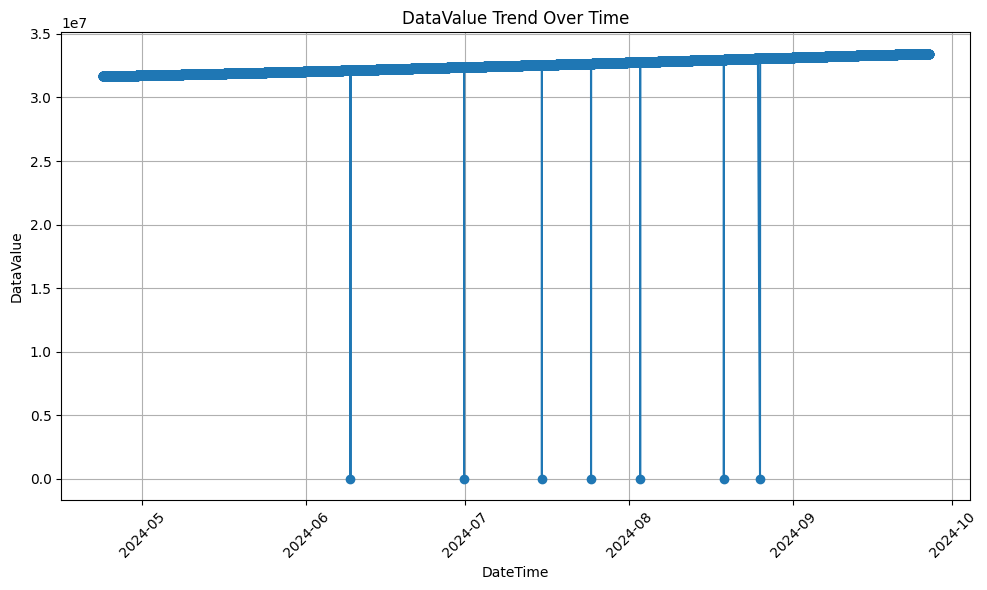

결측치 개수: DataValue    0
TimeStamp    0
DateTime     0
dtype: int64
이상치 개수 (Z-score > 3): 7
DataValue가 0인 값 개수: 7
누락된 구간: 2024-08-25 08:00 ~ 17:30, 누락된 데이터포인트: 56개


In [127]:
analyze_dataframe(df)

2024-08-25 08:00 ~ 17:30 분까지의 데이터가 사라졌음을 확인. (인덱스 없음) <br>
08:00 값 정상 /
17:30 0 value /
그 사이: 행 자체가 없음 <br>
이상치와 0value가 동일함을 확인. (7개)


In [128]:
def fill_missing_rows(df):
    # 데이터프레임을 datetime 기준으로 정렬
    df = df.sort_values(by='DateTime').reset_index(drop=True)

    # 시작 시간과 끝 시간을 설정
    start_time = df['DateTime'].min()
    end_time = df['DateTime'].max()

    # 10분 간격으로 모든 시간을 생성
    full_time_range = pd.date_range(start=start_time, end=end_time, freq='10T')

    # 새로운 행을 담을 리스트 생성
    new_rows = []

    for time in full_time_range:
        if not ((df['DateTime'] == time).any()):
            # 10분 단위로 존재하지 않는 시간에는 새로운 행 추가
            new_row = {
                'DataValue': 0,
                'TimeStamp': int(time.timestamp()),  # Unix 타임스탬프 생성
                'DateTime': time
            }
            new_rows.append(new_row)

    # 새로운 행들을 데이터프레임으로 변환
    new_rows_df = pd.DataFrame(new_rows)

    # 원래의 데이터프레임과 새로 생성한 행들을 합침
    df_full = pd.concat([df, new_rows_df]).sort_values(by='DateTime').reset_index(drop=True)

    return df_full

비어있던 구간이 맞게 채워졌는지 확인

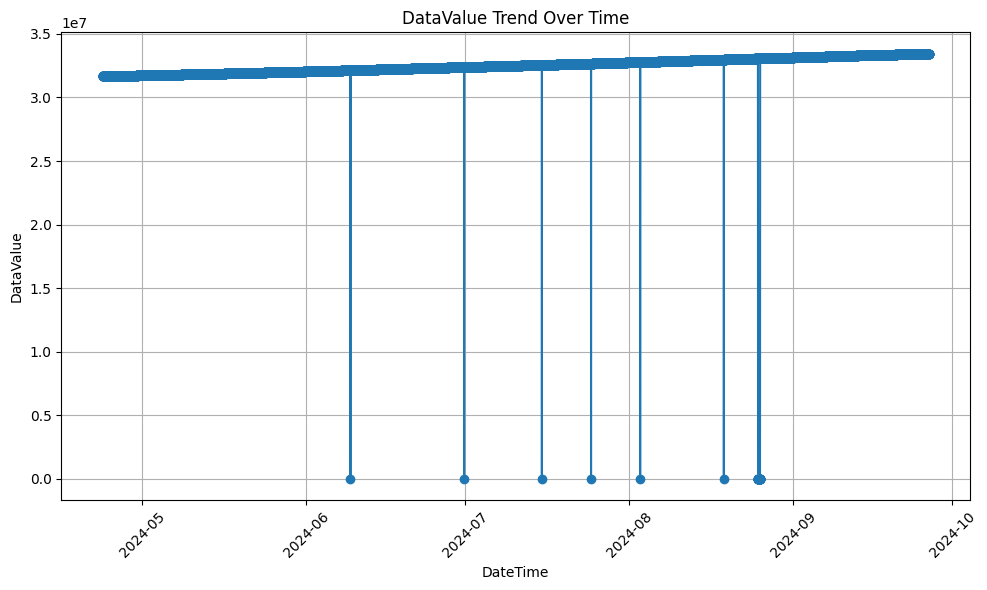

결측치 개수: DataValue     0
TimeStamp     0
DateTime      0
zscore       56
dtype: int64
이상치 개수 (Z-score > 3): 63
DataValue가 0인 값 개수: 63


In [129]:
df_filled = fill_missing_rows(df)
analyze_dataframe(df_filled)

결측치 및 이상치 모두 값 채워넣어주기 (선형보간법 사용) <br>
최종 DataSet모양 관찰

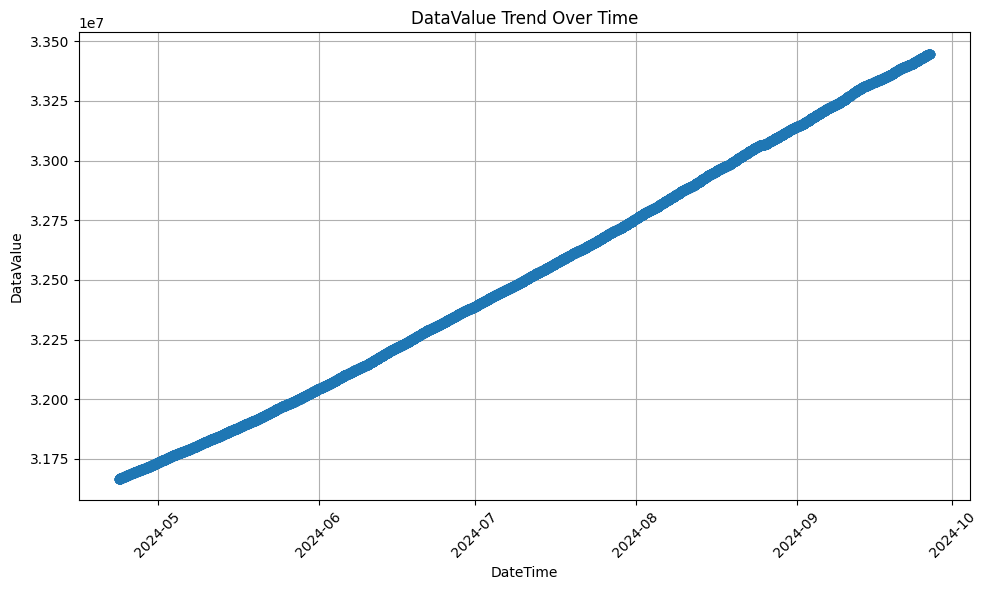

결측치 개수: DataValue    0
TimeStamp    0
DateTime     0
zscore       0
dtype: int64
이상치 개수 (Z-score > 3): 0
DataValue가 0인 값 개수: 0


In [133]:
import numpy as np
df = df_filled
# DataValue가 0인 부분을 선형보간법으로 채우기
df['DataValue'] = df['DataValue'].replace(0, np.nan)  # 0값을 NaN으로 변환
df['DataValue'] = df['DataValue'].interpolate(method='linear')  # 선형 보간법으로 채우기
df['DataValue'] = df['DataValue'].astype(int)

# 결과 출력
analyze_dataframe(df)

편의성을 위한 설정. (zscore column 삭제 및 datetime으로 index설정)

In [135]:
# zscore column이 있다면 삭제
df = df.drop(columns=['zscore'], errors='ignore')

# DateTime을 index로 설정
df.set_index('DateTime', inplace=True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

CSV 파일 저장됨: 2024-04-23_13:20~2024-09-26_14:50_***_processed.csv


파일 저장하기 (로컬 다운로드)

In [ ]:
from google.colab import files
# index의 시작값과 끝값을 문자열로 변환하여 파일명 생성
start_date = df.index.min().strftime('%Y-%m-%d_%H:%M')
end_date = df.index.max().strftime('%Y-%m-%d_%H:%M')
filename = f'{start_date}~{end_date}_***_processed.csv'

# 파일 저장
df.to_csv(filename)
files.download(filename)
# 파일명 출력
print(f"CSV 파일 저장됨: {filename}")


DB 서버와 연결 종료

In [114]:
# 연결 종료
cursor.close()